前期数据处理

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# 构建数据
N = 100

X = np.linspace(-1,1,N)

label = np.array(np.concatenate((np.zeros(70),np.ones(30))))


# 构建测试数据及训练数据
from sklearn.model_selection import train_test_split
X_train,X_test,label_train,label_test=train_test_split(
    X,label,random_state=1)

回归问题

sklearn多层感知器-回归模型得分 0.8013344623976929
总时间是： 0.000997304916381836


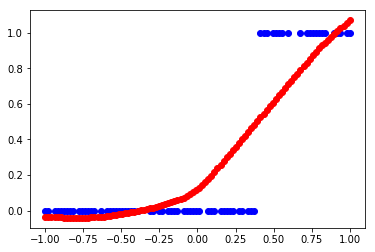

In [88]:
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing

model_mlp = MLPRegressor()
model_mlp.fit(X_train.reshape(-1,1),label_train)
import time
import datetime
startTime = time.time()
x1 = X.reshape(-1,1)
mlp_score=model_mlp.score(x1,label)
print('sklearn多层感知器-回归模型得分',mlp_score)#预测正确/总数
result = model_mlp.predict(x1)
stopTime = time.time()
sumTime = stopTime - startTime
print('总时间是：', sumTime)

plt.plot(X_train, label_train, 'bo')
plt.plot(x1, result, 'ro')
plt.show()

分类问题

In [106]:
from tkinter import Y
from sklearn.neural_network import MLPClassifier

#输入数据（特征）
x = [[0., 0.], [1., 1.]]

# 标签数据（标签）
y= [1, 2]

# 创建分类器
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)

# 训练分类器
mlp.fit(x, y)

print (mlp.n_layers_)
print (mlp.n_iter_)
print (mlp.loss_)
print (mlp.out_activation_)
              
results = mlp.predict([[-2., -2.]])
print(results)

4
200
0.3950243537765077
logistic
[1]


f:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


测试

In [18]:

from sklearn.neural_network import MLPClassifier
import numpy as np
import pickle
import gzip


# 加载数据
# mnist = fetch_mldata("MNIST original")
with gzip.open("D:\shujuji\mnist.pkl.gz") as fp:
    training_data,valid_data,test_data = pickle.load(fp,encoding='bytes')
x_training_data,y_training_data = training_data
x_valid_data,y_valid_data = valid_data
x_test_data,y_test_data = test_data
classes = np.unique(y_test_data)

# 将验证集和训练集合并
x_training_data_final = np.vstack((x_training_data,x_valid_data))
y_training_data_final = np.append(y_training_data,y_valid_data)


# 设置神经网络模型参数
mlp = MLPClassifier(solver='sgd', activation='relu',alpha=1e-4,hidden_layer_sizes=(50,50), random_state=1,max_iter=10,verbose=10,learning_rate_init=.1)

# 训练模型
mlp.fit(x_training_data_final, y_training_data_final) 

# 查看模型结果
print (mlp.score(x_test_data,y_test_data))
print (mlp.n_layers_)
print (mlp.n_iter_)
print (mlp.loss_)
print (mlp.out_activation_)

Iteration 1, loss = 0.31443422
Iteration 2, loss = 0.13116809
Iteration 3, loss = 0.09821663
Iteration 4, loss = 0.08121343
Iteration 5, loss = 0.06766265
Iteration 6, loss = 0.06211262
Iteration 7, loss = 0.05296883
Iteration 8, loss = 0.04745517
Iteration 9, loss = 0.04395758
Iteration 10, loss = 0.03888455
0.9713
4
10
0.03888454681923549
softmax


f:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
